from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [1]:
import scendict as sc
import netCDF4 as nc
import xarray as xr
import numpy as np
import warnings
import cartopy as cp
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

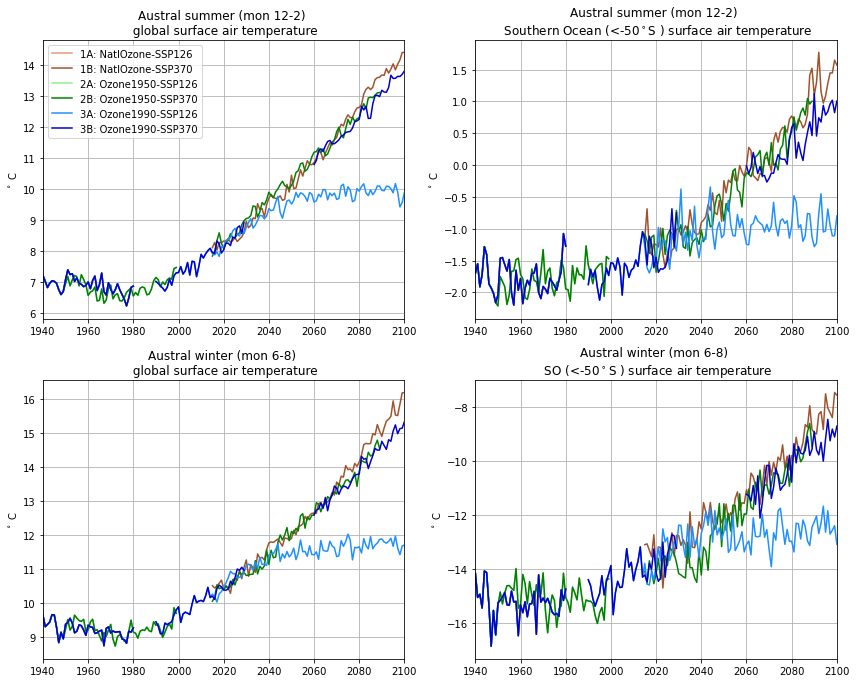

In [6]:
tmesh = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
#print(tmesh)
# print(tmesh['nav_lat'][0:37,0])

yrs = np.arange(1940,2101,1)


scens = ['1A','1B','2A','2B','3A','3B']
var = 'mean_tair'; varstr = 'monthly_airtemp';
adj = -273.15

fact = 0.6
fig, axs = plt.subplots(2,2, figsize=(20*fact, 16*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel()
#summer, whole world
for s in range(0,6):
    scen = scens[s]
    w = nc.Dataset(f'./EXTRACT/ncs/scen_{scen}_{varstr}.nc')
    
    tair = w[var][:,12,:,:]+adj
    tair_mean = np.nanmean(np.nanmean(tair, axis = 2),axis = 1)
    axs[0].plot(yrs,tair_mean, color = sc.scen[scen]['color'], \
               label =  sc.scen[scen]['name'])

    tair = w[var][:,12,0:37,:]+adj
    tair_mean = np.nanmean(np.nanmean(tair, axis = 2),axis = 1)
    axs[1].plot(yrs,tair_mean, color = sc.scen[scen]['color'])


    tair = w[var][:,13,:,:]+adj
    tair_mean = np.nanmean(np.nanmean(tair, axis = 2),axis = 1)
    axs[2].plot(yrs,tair_mean, color = sc.scen[scen]['color'])

    tair = w[var][:,13,0:37,:]+adj
    tair_mean = np.nanmean(np.nanmean(tair, axis = 2),axis = 1)
    axs[3].plot(yrs,tair_mean, color = sc.scen[scen]['color'])    

tits = ['Austral summer (mon 12-2) \n global surface air temperature',\
        'Austral summer (mon 12-2) \n Southern Ocean (<-50$^\circ$S ) surface air temperature',\
        'Austral winter (mon 6-8) \n global surface air temperature',\
        'Austral winter (mon 6-8) \n SO (<-50$^\circ$S ) surface air temperature',]
for i in range(0,4):
    axs[i].set_xlim([1940,2100])
    axs[i].grid()
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('$^\circ$ C')
    
axs[0].legend(loc = 'best')
plt.tight_layout()
#     axs[i].set_title(f'Month {i+1}')

In [32]:
print(np.shape(base_mean))
print(nav_lat

(149, 182)


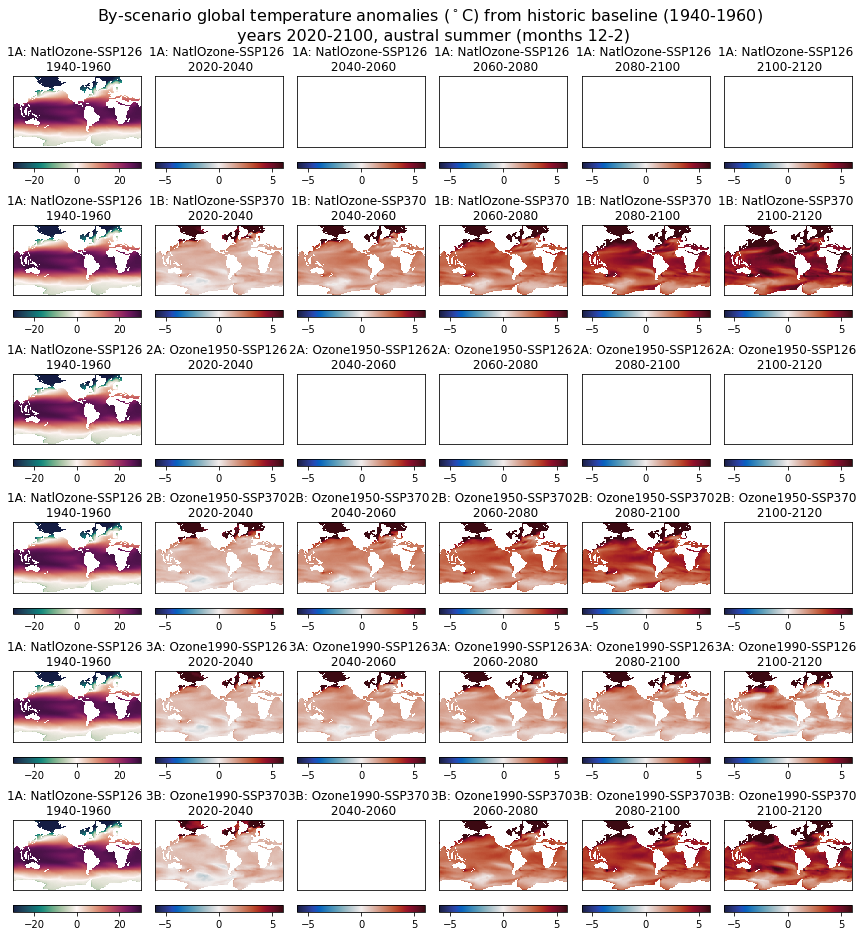

In [33]:
scens = ['1A','1B','2A','2B','3A','3B']
varstr = 'monthly_airtemp'; varstr = 'monthly_airtemp'
var = 'mean_tair'; sind = 12 #seasonal indicator! 12 or 13
stit = 'By-scenario global temperature anomalies ($^\circ$C) from historic baseline (1940-1960) \n years 2020-2100, austral summer (months 12-2)'
ys = 0; ye = 149
## O mask:
tmesh = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmask = ((tmesh['tmask'][0,0,ys:ye,:]))

#get baseline
w = nc.Dataset(f'./EXTRACT/ncs/scen_1A_{varstr}.nc')
tair = w[var][:]-273.15
base_mean = np.nanmean(tair[1940-1940:1960-1940,sind,ys:ye,:],axis = 0)
base_mean[tmask == 0] = np.nan


fact = 0.6
fig, axs = plt.subplots(6,6, figsize=(20*fact, 22*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].pcolormesh(base_mean, cmap = cm.cm.thermal, vmin = -10, vmax = 20)

startrow = [0,6,12,18,24,30]
for s in range(0,6):
    si = startrow[s]
    w = nc.Dataset(f'./EXTRACT/ncs/scen_{scens[s]}_{varstr}.nc')
    tair = w[var][:]-273.15
    w = axs[si].pcolormesh(base_mean, cmap = cm.cm.curl, vmin = -30, vmax = 30)
    tn = sc.scen[scens[0]]['name']
    axs[si].set_title(f'{tn} \n 1940-1960')
    axs[si].set_yticks([]); axs[si].set_xticks([]);
    fig.colorbar(w, ax=axs[si], orientation = 'horizontal')
    
    for i in range(1,6):
        start = 2000+i*20; end = start+20
        per_mean = np.nanmean(tair[start-1940:end-1940,sind,ys:ye,:],axis = 0)
        per_anom =  per_mean- base_mean
        w = axs[si+i].pcolormesh(per_anom, cmap = cm.cm.balance, vmin = -6, vmax = 6)
        tn = sc.scen[scens[s]]['name']
        axs[si+i].set_title(f'{tn} \n {start}-{end}')
        fig.colorbar(w, ax=axs[si+i], orientation = 'horizontal')
        axs[si+i].set_yticks([]); axs[si+i].set_xticks([]);

plt.suptitle(stit, fontsize = 16)
             
plt.tight_layout()
fig.savefig('global_temp_anom.jpg', dpi = 300)
